In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel("Data science.xlsx",sheetname="Sheet1",na_vales=0)

In [3]:
data.head()

,User id,Category,Category_id,Product,Product_id,Ordered Date,Price Spent
0,2,Electronics,7,TV,1,2017-09-23,20000
1,1,Groceries,1,Rice,4,2017-09-24,1500
2,4,Transit,13,Cab Booking,9,2017-09-24,300
3,1,Electronics,7,Mobile,2,2017-09-25,15000
4,3,Groceries,1,Atta,5,2017-09-25,500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
User id         42 non-null int64
Category        42 non-null object
Category_id     42 non-null int64
Product         42 non-null object
Product_id      42 non-null int64
Ordered Date    42 non-null datetime64[ns]
Price Spent     42 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.4+ KB


In [5]:
data.describe()

,User id,Category_id,Product_id,Price Spent
count,42.000000,42.000000,42.000000,42.000000
mean,2.547619,7.809524,6.714286,6745.238095
std,1.108776,4.191967,3.006381,11377.324525
min,1.000000,1.000000,1.000000,200.000000
25%,2.000000,5.000000,4.000000,500.000000
50%,2.500000,7.000000,8.000000,1650.000000
75%,3.750000,11.000000,9.000000,9000.000000
max,4.000000,13.000000,10.000000,50000.000000


In [6]:
data.isnull().sum()

User id         0
Category        0
Category_id     0
Product         0
Product_id      0
Ordered Date    0
Price Spent     0
dtype: int64

In [7]:
data["Category"].value_counts()

Electronics             10
Apparels                 9
Transit                  9
Groceries                7
Movies/Entertainment     7
Name: Category, dtype: int64

In [8]:
print(np.unique(data["Category"]))
print(np.unique(data["Category_id"]))

['Apparels' 'Electronics' 'Groceries' 'Movies/Entertainment' 'Transit']
[ 1  5  7 11 13]


In [9]:
data.groupby(["Category"])["Category_id"].max()

Category
Apparels                11
Electronics              7
Groceries                1
Movies/Entertainment     5
Transit                 13
Name: Category_id, dtype: int64

In [10]:
#category=[]
#for i in data["Category"]:
    #if i not in category:
        #category.append(i)
        #print(data.loc[data.Category==i,"Category_id"])

In [11]:
data["Category_id"].value_counts()

7     10
13     9
11     9
5      7
1      7
Name: Category_id, dtype: int64

In [12]:
print(data["Product"].value_counts())
print(data["Product_id"].value_counts())

Clothing         9
Cab Booking      9
Movie Booking    7
Mobile           5
Rice             3
Dal              2
TV               2
Refrigerator     2
Atta             2
Oven             1
Name: Product, dtype: int64
9     9
8     9
10    7
2     5
4     3
6     2
5     2
3     2
1     2
7     1
Name: Product_id, dtype: int64


In [13]:
data.groupby(["Product"])["Product_id"].max()

Product
Atta              5
Cab Booking       9
Clothing          8
Dal               6
Mobile            2
Movie Booking    10
Oven              7
Refrigerator      3
Rice              4
TV                1
Name: Product_id, dtype: int64

In [14]:
print(data.groupby(["User id","Category_id","Product_id"])["Price Spent"].mean())

User id  Category_id  Product_id
1        1            4              1500.000000
                      5               200.000000
         5            10              900.000000
         7            2             15000.000000
         11           8              2000.000000
         13           9               600.000000
2        1            4              1800.000000
                      6               400.000000
         5            10              900.000000
         7            1             20000.000000
                      2             10000.000000
                      7              6000.000000
         11           8              8166.666667
         13           9               350.000000
3        1            4              1200.000000
                      5               500.000000
         5            10              450.000000
         7            3             30000.000000
         11           8              6000.000000
         13           9             

In [15]:
#estimatiing the max price spent by users for each product in categories
print(data.groupby(["Category","Product"])["Price Spent"].max())

Category              Product      
Apparels              Clothing         20000
Electronics           Mobile           20000
                      Oven              6000
                      Refrigerator     50000
                      TV               40000
Groceries             Atta               500
                      Dal               2000
                      Rice              1800
Movies/Entertainment  Movie Booking     1200
Transit               Cab Booking       1000
Name: Price Spent, dtype: int64


In [16]:
print(data.groupby(["Category","Product"])["User id"].count())

Category              Product      
Apparels              Clothing         9
Electronics           Mobile           5
                      Oven             1
                      Refrigerator     2
                      TV               2
Groceries             Atta             2
                      Dal              2
                      Rice             3
Movies/Entertainment  Movie Booking    7
Transit               Cab Booking      9
Name: User id, dtype: int64


In [17]:
#seggrigating by users
Users_data=data.groupby("User id")
p=(group.sort_index(by="Category_id", ascending=True) for Product_id,group in Users_data)

In [18]:
for i in p:
    print(i)

    User id              Category  Category_id        Product  Product_id  \
1         1             Groceries            1           Rice           4   
21        1             Groceries            1           Atta           5   
13        1  Movies/Entertainment            5  Movie Booking          10   
3         1           Electronics            7         Mobile           2   
30        1           Electronics            7         Mobile           2   
36        1           Electronics            7         Mobile           2   
16        1              Apparels           11       Clothing           8   
8         1               Transit           13    Cab Booking           9   
29        1               Transit           13    Cab Booking           9   

   Ordered Date  Price Spent  
1    2017-09-24         1500  
21   2017-10-11          200  
13   2017-10-04          900  
3    2017-09-25        15000  
30   2017-10-16        10000  
36   2017-10-20        20000  
16   2017-10

C:\Users\merus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
data1=data.drop(["User id","Product","Category","Ordered Date"],axis=1)
data1.head()

,Category_id,Product_id,Price Spent
0,7,1,20000
1,1,4,1500
2,13,9,300
3,7,2,15000
4,1,5,500


In [20]:
# clustering 
from sklearn.cluster import KMeans

In [21]:
X=data1.values
type(X)

numpy.ndarray

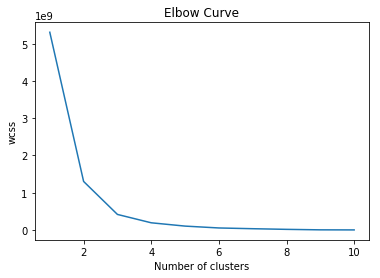

In [22]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [23]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(X)

In [24]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)

[[  7.83870968e+00   8.00000000e+00   1.23548387e+03]
 [  8.00000000e+00   3.37500000e+00   1.56250000e+04]
 [  7.00000000e+00   2.33333333e+00   4.00000000e+04]]


In [25]:
print(labels)

[1 0 0 1 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 2 1 2 0 1
 0 0 0 0 0]


In [26]:
data["Ordered Date"]=pd.to_datetime(data["Ordered Date"])

In [27]:
data.dtypes

User id                  int64
Category                object
Category_id              int64
Product                 object
Product_id               int64
Ordered Date    datetime64[ns]
Price Spent              int64
dtype: object

In [28]:
OrderedDate_min=data["Ordered Date"].min()
OrderedDate_max=data["Ordered Date"].max()
print(OrderedDate_min)
print(OrderedDate_max)

2017-09-23 00:00:00
2017-10-22 00:00:00


In [29]:
print(OrderedDate_max-OrderedDate_min)

29 days 00:00:00


In [30]:
data["Ordered Date"].dt.weekday_name

0      Saturday
1        Sunday
2        Sunday
3        Monday
4        Monday
5       Tuesday
6      Thursday
7      Thursday
8        Friday
9      Saturday
10       Monday
11       Monday
12      Tuesday
13    Wednesday
14    Wednesday
15     Thursday
16     Saturday
17       Sunday
18      Tuesday
19      Tuesday
20    Wednesday
21    Wednesday
22     Thursday
23       Friday
24       Friday
25     Saturday
26     Saturday
27     Saturday
28     Saturday
29       Monday
30       Monday
31       Monday
32       Monday
33     Thursday
34     Thursday
35     Thursday
36       Friday
37       Friday
38       Friday
39       Friday
40       Sunday
41       Sunday
Name: Ordered Date, dtype: object

In [31]:
data["Ordered Date"].value_counts()

2017-10-14    4
2017-10-16    4
2017-10-20    4
2017-10-19    3
2017-09-28    2
2017-10-04    2
2017-10-10    2
2017-10-22    2
2017-10-02    2
2017-10-11    2
2017-09-25    2
2017-09-24    2
2017-10-13    2
2017-09-23    1
2017-10-12    1
2017-09-30    1
2017-10-05    1
2017-10-07    1
2017-10-08    1
2017-09-26    1
2017-10-03    1
2017-09-29    1
Name: Ordered Date, dtype: int64

In [32]:
days=data["Ordered Date"].dt.weekday
days.head()

0    5
1    6
2    6
3    0
4    0
Name: Ordered Date, dtype: int64

In [33]:
days.value_counts().sort_index()

0    8
1    4
2    4
3    7
4    7
5    7
6    5
Name: Ordered Date, dtype: int64

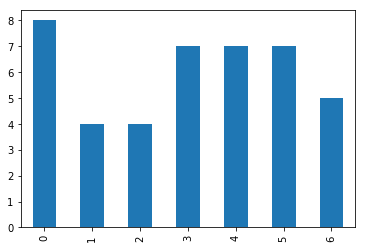

In [34]:
#orders on days of week
days.value_counts().sort_index().plot(kind="bar")

In [35]:
days_=data["Ordered Date"].dt.weekday_name
days_.head()

0    Saturday
1      Sunday
2      Sunday
3      Monday
4      Monday
Name: Ordered Date, dtype: object

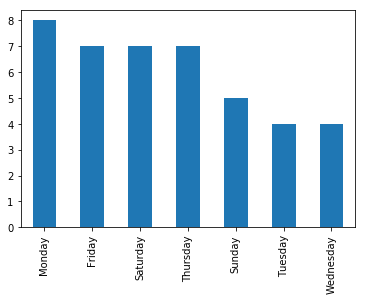

In [36]:
days_.value_counts().plot(kind="bar")

In [37]:
data["Ordered Date"].dt.day.value_counts()

14    4
20    4
16    4
19    3
4     2
10    2
11    2
13    2
2     2
22    2
24    2
25    2
28    2
23    1
29    1
12    1
26    1
8     1
7     1
5     1
3     1
30    1
Name: Ordered Date, dtype: int64

In [38]:
data["Ordered Date"].dt.month.value_counts()

10    32
9     10
Name: Ordered Date, dtype: int64

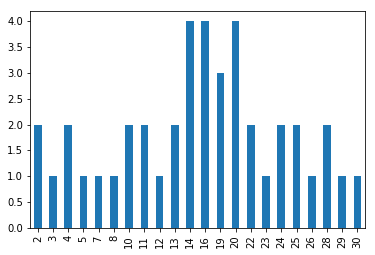

In [39]:
data["Ordered Date"].dt.day.value_counts().sort_index().plot(kind="bar")

In [51]:
print(data.groupby(["Ordered_Date","Product"])["Category"].count())

Ordered_Date  Product      
2017-09-23    TV               1
2017-09-24    Cab Booking      1
              Rice             1
2017-09-25    Atta             1
              Mobile           1
2017-09-26    Clothing         1
2017-09-28    Dal              1
              Refrigerator     1
2017-09-29    Cab Booking      1
2017-09-30    Movie Booking    1
2017-10-02    Mobile           1
              Movie Booking    1
2017-10-03    Rice             1
2017-10-04    Movie Booking    2
2017-10-05    Cab Booking      1
2017-10-07    Clothing         1
2017-10-08    Cab Booking      1
2017-10-10    Clothing         2
2017-10-11    Atta             1
              Mobile           1
2017-10-12    Movie Booking    1
2017-10-13    Clothing         1
              Rice             1
2017-10-14    Cab Booking      1
              Clothing         1
              Dal              1
              Movie Booking    1
2017-10-16    Cab Booking      1
              Mobile           1
              M

In [50]:
data=data.rename(columns={"Ordered Date":"Ordered_Date"})

In [84]:
data1=data.loc[:,["User id","Product","Ordered_Date"]]
data1.head()

,User id,Product,Ordered_Date
0,2,TV,2017-09-23
1,1,Rice,2017-09-24
2,4,Cab Booking,2017-09-24
3,1,Mobile,2017-09-25
4,3,Atta,2017-09-25


In [89]:
P_data=data1.groupby("Product")
p=(group.sort_index(by="User id", ascending=True) for Ordered_Date,group in P_data)

In [90]:
for i in p:
    print(i)

    User id Product Ordered_Date
21        1    Atta   2017-10-11
4         3    Atta   2017-09-25
    User id      Product Ordered_Date
8         1  Cab Booking   2017-09-29
29        1  Cab Booking   2017-10-16
17        2  Cab Booking   2017-10-08
26        2  Cab Booking   2017-10-14
15        3  Cab Booking   2017-10-05
35        3  Cab Booking   2017-10-19
38        3  Cab Booking   2017-10-20
2         4  Cab Booking   2017-09-24
39        4  Cab Booking   2017-10-20
    User id   Product Ordered_Date
16        1  Clothing   2017-10-07
5         2  Clothing   2017-09-26
33        2  Clothing   2017-10-19
37        2  Clothing   2017-10-20
18        3  Clothing   2017-10-10
23        3  Clothing   2017-10-13
19        4  Clothing   2017-10-10
25        4  Clothing   2017-10-14
41        4  Clothing   2017-10-22
    User id Product Ordered_Date
27        2     Dal   2017-10-14
6         4     Dal   2017-09-28
    User id Product Ordered_Date
3         1  Mobile   2017-09-25
30    

C:\Users\merus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [106]:
X=data.loc[:,["Category_id","Product_id","Ordered_Date","Price Spent"]].values
X[1:3,:]

array([[1, 4, Timestamp('2017-09-24 00:00:00'), 1500],
       [13, 9, Timestamp('2017-09-24 00:00:00'), 300]], dtype=object)

In [100]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'